#### Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [749]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split

In [750]:
#json.load((open('logins.json')))

# load as Pandas dataframe
login_df = pd.read_json('logins.json')

login_df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [751]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [752]:
# Set login_time column as an index of type DatetimeIndex
login_df = login_df.set_index('login_time')
login_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [753]:
type(login_df)

pandas.core.frame.DataFrame

In [754]:
# Make dataframe from DatetimeIndex 
#Create a dataFrame with a column containing the index
login_df = login_df.index.to_frame(index = True)
login_df.head()

,login_time
login_time,
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


Resample and Count the number of login in 15 minutes frequency.

In [755]:
# Resampling the time series data based on 15 minutes
#Downsample into 15 minute bins and label each bin using the left edge.

df_agg15 = pd.DataFrame({'count' : login_df.login_time.resample('15T').count()})
df_agg15.head(20)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [756]:
df_agg15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


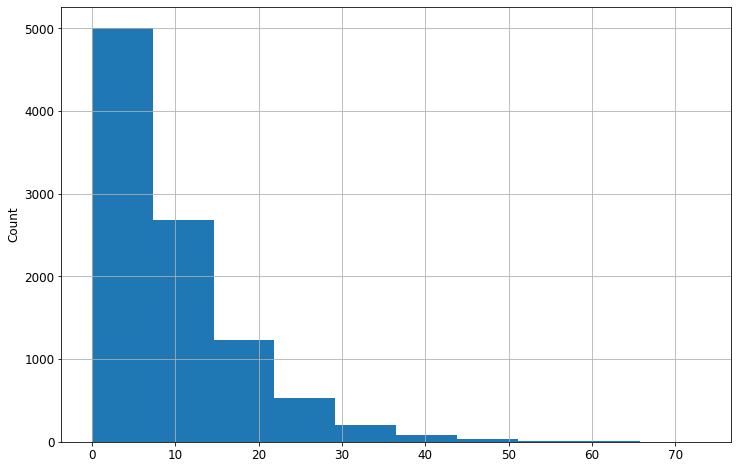

In [757]:
plt.figure(figsize = (12, 8))
df_agg15['count'].hist()
#plt.xlabel("Login Date")
plt.ylabel("Count")
#plt.title("Login Frequency")

plt.show()

The number of 15-minute intervals with zero logins is around 5000. The 15-minute intervals with logins greater than 40 can be considered as outliers.

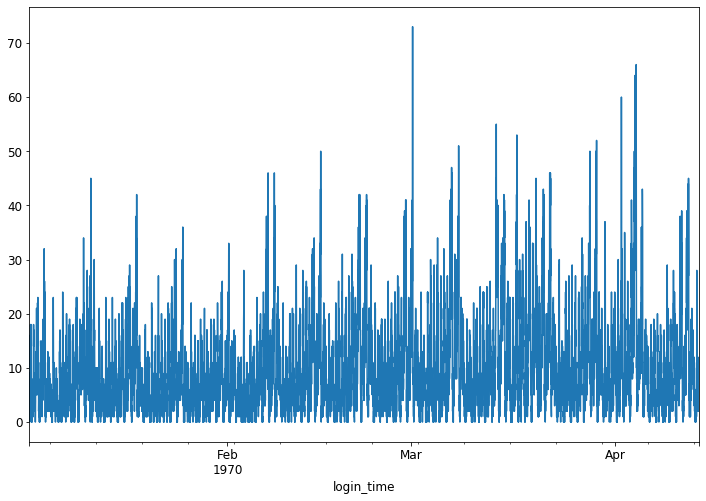

In [758]:
plt.figure(figsize = (12, 8))
df_agg15['count'].plot()
plt.show()

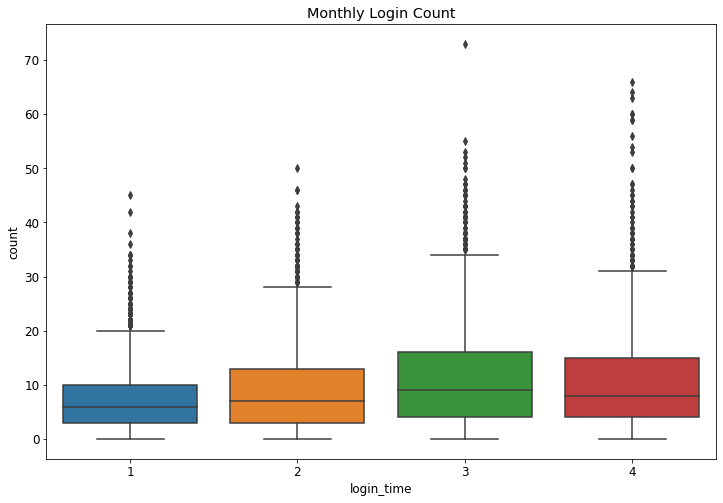

In [759]:
# Box and whisker plot
plt.figure(figsize = (12, 8))
sns.boxplot(df_agg15.index.month, df_agg15['count'])
plt.title("Monthly Login Count")
plt.show()

As shown in the "Monthly Login Count" figure, the maximum average of logins count is occured in March and the minimum is for January.

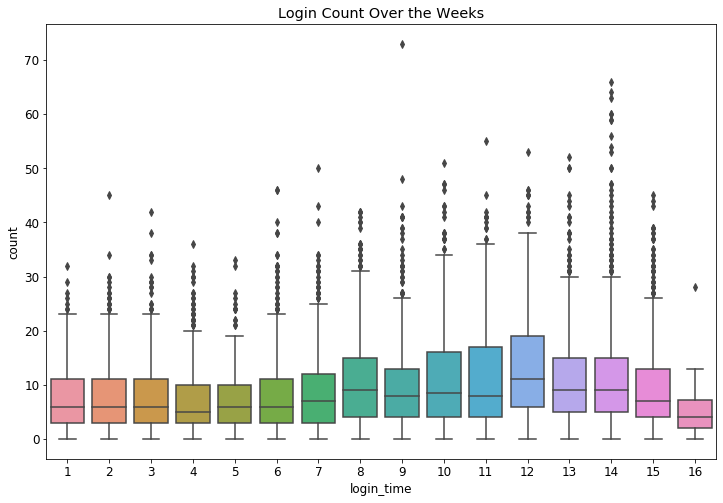

In [760]:
# Box and whisker plot
plt.figure(figsize = (12, 8))
sns.boxplot(df_agg15.index.week, df_agg15['count'])
plt.title("Login Count Over the Weeks")
plt.show()

In [761]:
weekly_df = login_df.groupby(login_df.index.weekday_name).count()
weekly_df = weekly_df.rename(columns={'login_time': 'count'})
weekly_df.index.names = ['Week_day']
weekly_df.head(7)

,count
Week_day,
Friday,15208
Monday,8823
Saturday,19377
Sunday,18167
Thursday,11960
Tuesday,9268
Wednesday,10339


In [762]:
weekly_df.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='Week_day')

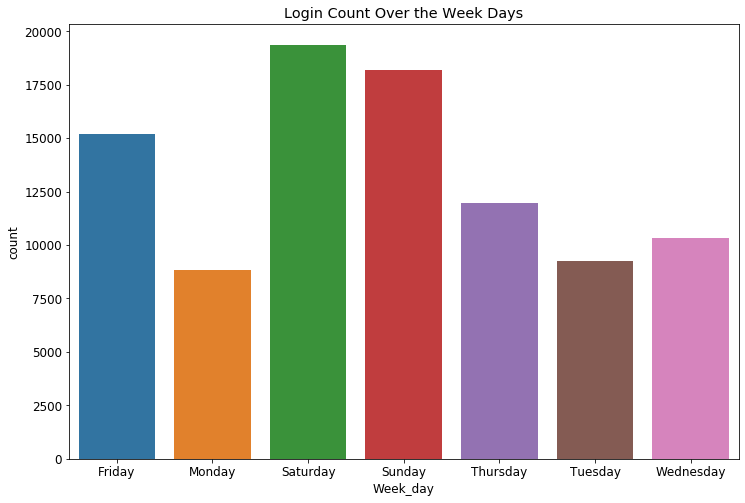

In [763]:
plt.figure(figsize = (12, 8))
sns.barplot(x=weekly_df.index, y='count', data= weekly_df)
plt.title("Login Count Over the Week Days")
plt.show()

It seems that the number of logings increase during the weekends.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

<li>2.a. how you will implement the experiment


To implement the experiment, first a random sample of the drivers from both cities before and after toll reimbursment will be obtained. Dataset should include rides data such as date of the ride, fair amount per ride, destination, city of driver partners, and number of rides per driver. Two measurement keys will be added as extracted features which are avg_daily_fair_amount and avg_numbers_of_rids for drivers in both cities before and after toll reimbursment.

<li>2.b. what statistical test(s) you will conduct to verify the significance of the
observation

To test the effectiveness of toll reimbursment, t-test can be performed. It provides paired observation of before and after toll reimbursmen datasets.

The null hypothesis of the experiment will be that there is avg_daily_fair_amount is the same before and after toll reimbursment. The alternative hypothesis is that the avg_daily_fair_amount after toll reimbursement is greater than the avg_daily_fair_amount before toll reimbursement is greater.

The null hypothesis of the experiment will be that there is avg_numbers_of_rids is the same before and after toll reimbursment. The alternative hypothesis is that the avg_numbers_of_rids after toll reimbursement is greater than the avg_numbers_of_rids before toll reimbursement is greater.

Iterpret the results based on t-statistic if the p-value is less than 0.05, then the null hypothesis is rejected and  it represents that toll reimburment is not beneficial to driver partners in both cities. 

<li>2.c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Assume that the fair_amount in one of these two cites is higher than the other one. In this case, toll reimbursment can attract drivers partner from city with lower fair_amount to accepts the rides from the other cities. Therefore, although total avg_daily_fair_amount is increased but it decrases the avg_daily_fair_amount and avg_numbers_of_rids of the drivers partner in city with higher fair_amount. Morover, it may cause the shortage in the city with lower fair_amount.

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [764]:
loaded_ultimate_data = json.load(open('ultimate_data_challenge.json'))
#loaded_ultimate_data

In [765]:
type(loaded_ultimate_data)

list

In [766]:
ultimate_df = pd.DataFrame(loaded_ultimate_data)
ultimate_df


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


# Data description

<li> city: city this user signed up in
<li> phone: primary device for this user
<li> signup_date: date of account registration; in the form ‘YYYYMMDD’
<li> last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
<li> avg_dist: the average distance in miles per trip taken in the first 30 days after signup
<li> avg_rating_by_driver: the rider’s average rating over all of their trips
<li> avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
<li> surge_pct: the percent of trips taken with surge multiplier > 1
<li> avg_surge: The average surge multiplier over all of this user’s trips
<li> trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
<li> ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
<li> weekday_pct: the percent of the user’s trips occurring during a weekday

# Data Wrangling

In [767]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [768]:
ultimate_df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [769]:
ultimate_df = ultimate_df.dropna()
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


In [770]:
ultimate_df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [771]:
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [772]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


In [773]:
ultimate_df['active_days'] = (ultimate_df['last_trip_date'] - ultimate_df['signup_date']).dt.days

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [774]:
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_days
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,179
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,148
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111


In [775]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
active_days               41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


Lets check to see whether or not a user will be active in their 6th month on the system.

In [776]:
# Create a new column by assigning value 1 to active user and 0 to not active ones.
ultimate_df['retaind_users'] = ultimate_df['active_days'].apply(lambda x: 1 if int(x >= 150) else 0)
ultimate_df

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_days,retaind_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7,179,1
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5,148,0
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111,0


In [777]:
ultimate_df.head(15)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_days,retaind_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148,0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,1,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,11,0
10,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9,137,0
11,Winterfell,3,2014-01-06,4.0,1.00,2014-01-10,iPhone,0.0,False,100.0,3.81,5.0,4,0


## 1. What fraction of the observed users were retained?

In [778]:
ultimate_df['retaind_users'].value_counts(normalize=True)

0    0.717433
1    0.282567
Name: retaind_users, dtype: float64

Around 28% of the users are retained user that means they were active in the last 6 months.

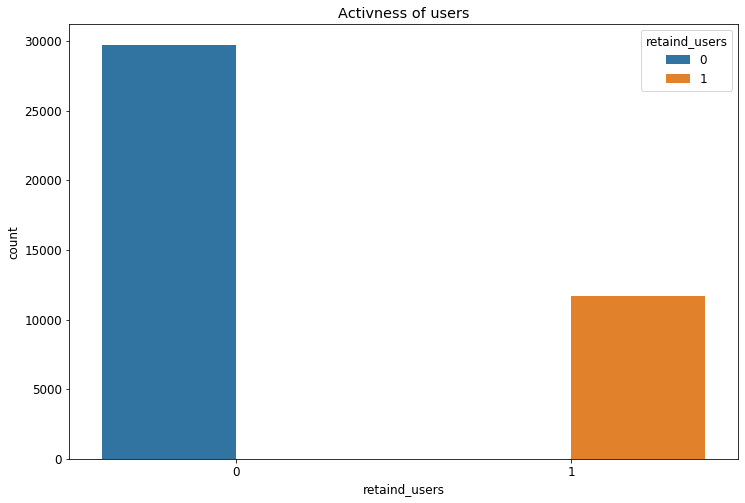

In [779]:
plt.figure(figsize = (12, 8))
sns.countplot(x='retaind_users', data= ultimate_df, hue='retaind_users')
plt.title("Activness of users")
plt.show()

In [780]:
# Lets see the percentage of ultimate_black_user
ultimate_df['ultimate_black_user'].value_counts(normalize=True)

False    0.615901
True     0.384099
Name: ultimate_black_user, dtype: float64

In [781]:
# Lets see how many of users have iphone and how many have Android
ultimate_df['phone'].value_counts(normalize=True)

iPhone     0.708216
Android    0.291784
Name: phone, dtype: float64

Most of the users have iphone.

In [782]:
# Lets see the percantage of users in each city
ultimate_df['city'].value_counts(normalize=True)

Winterfell        0.462324
Astapor           0.325950
King's Landing    0.211726
Name: city, dtype: float64

Most number of rides belongs to Winterfell.

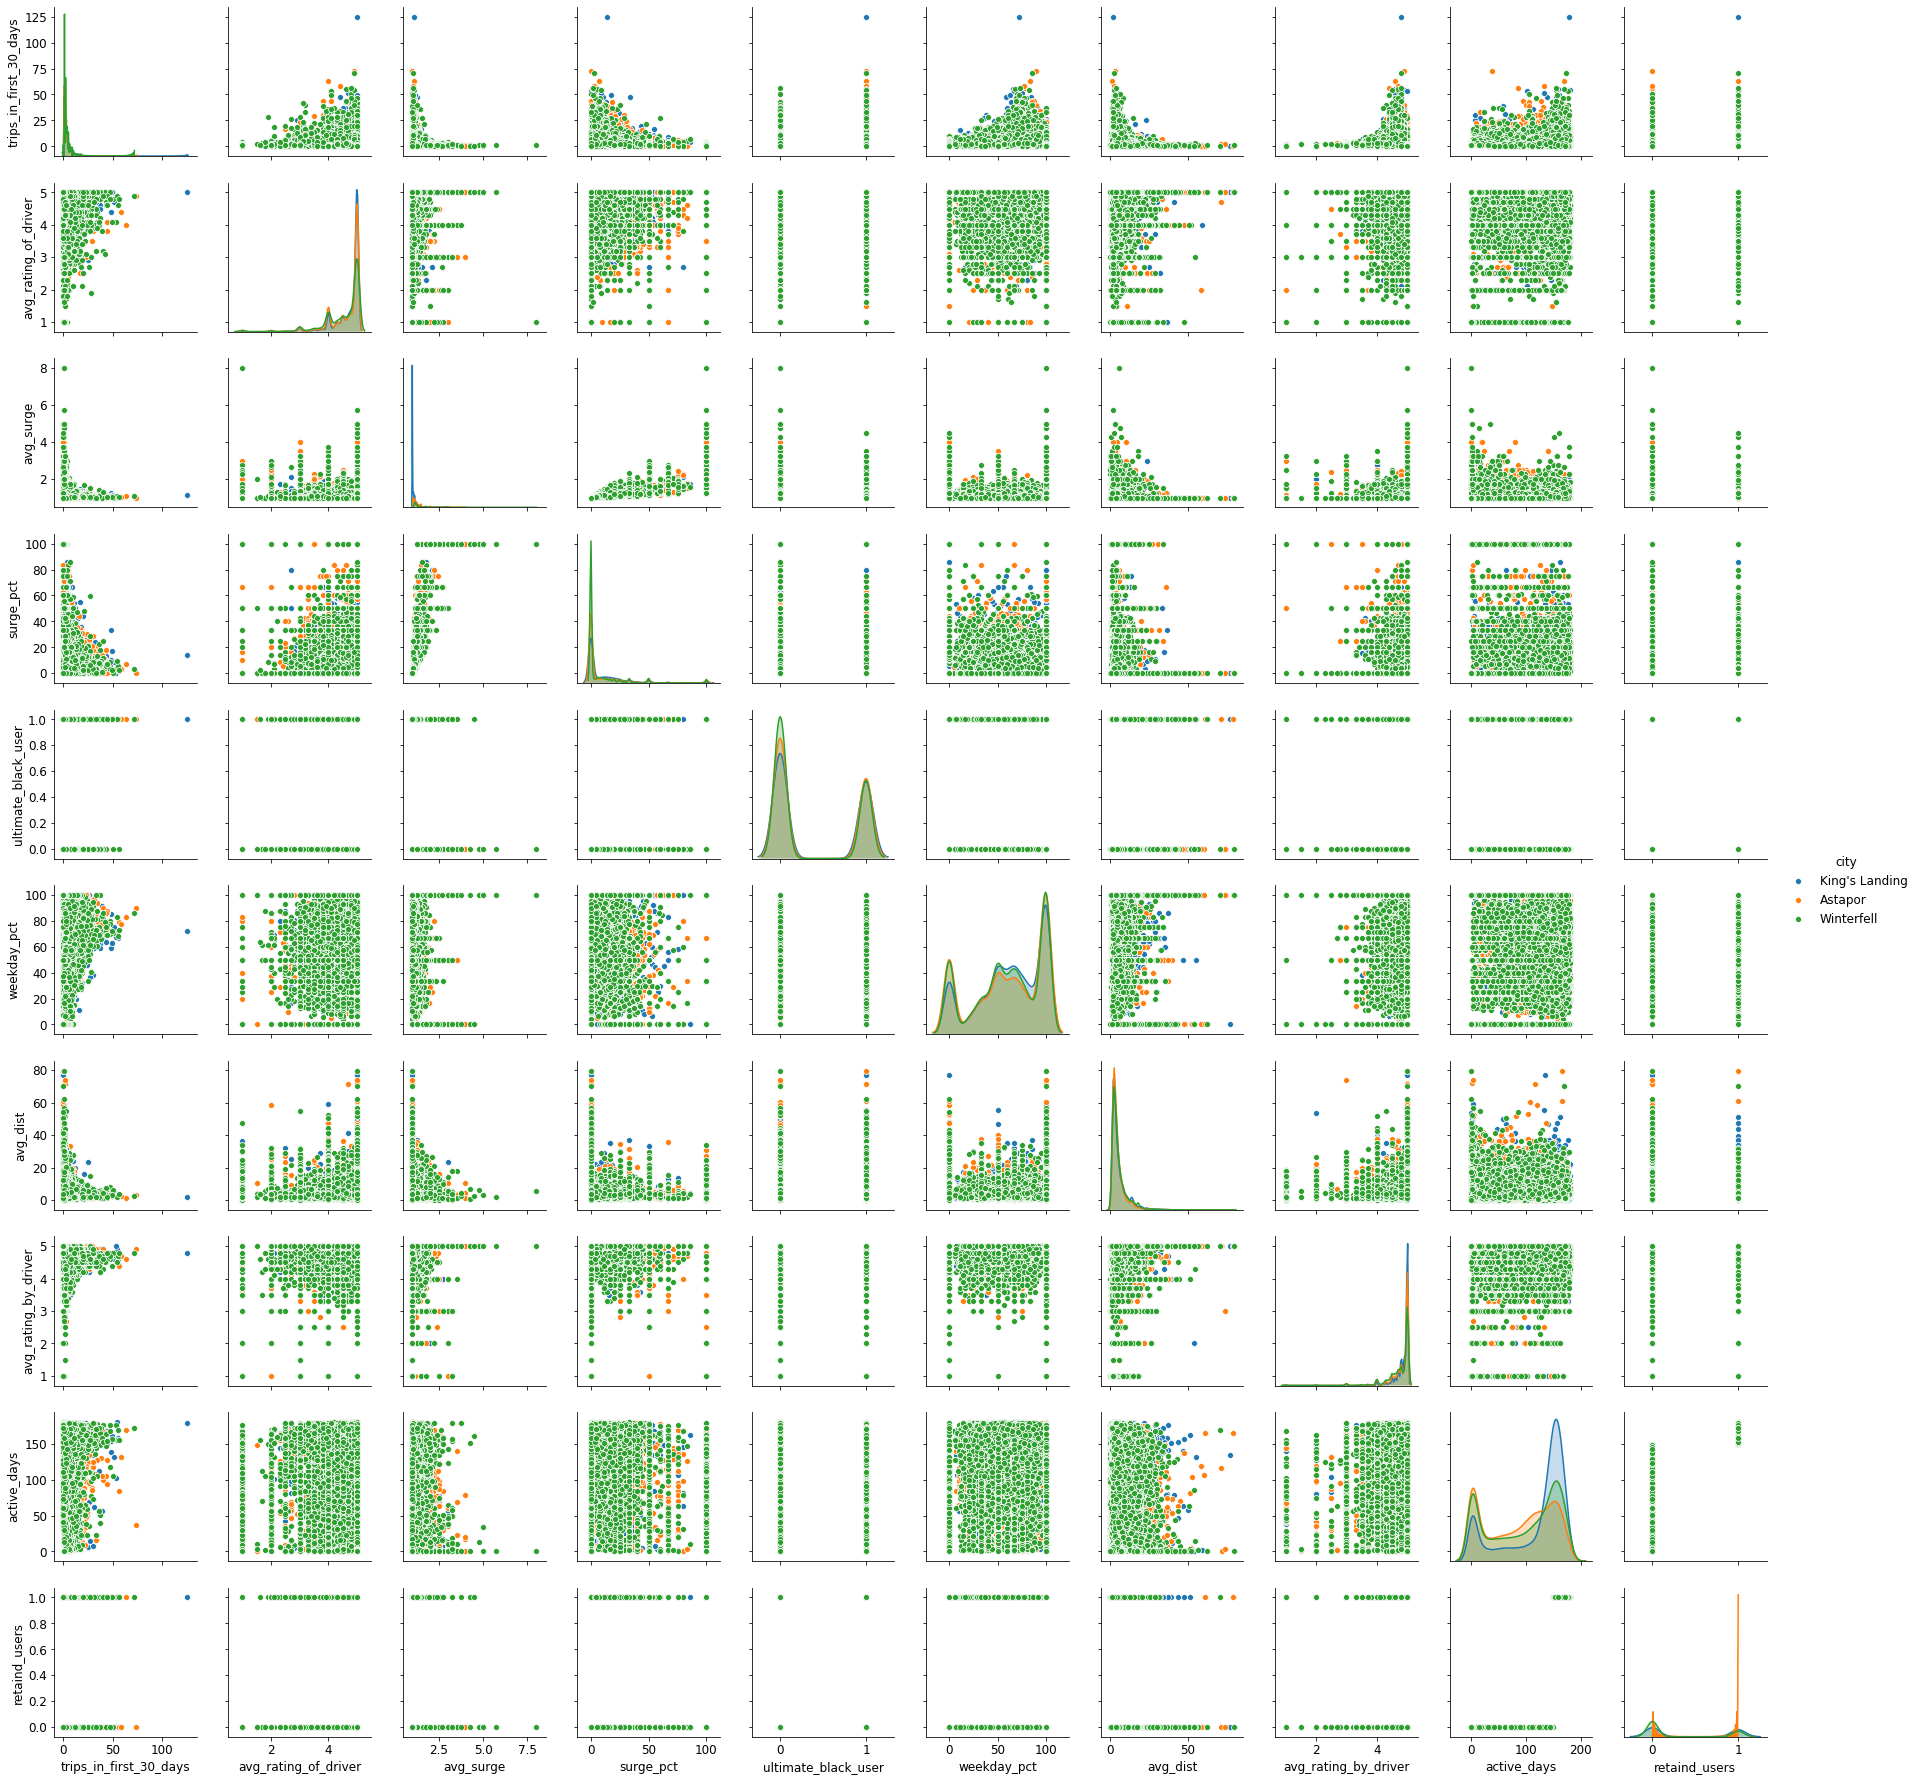

In [783]:
sns.pairplot(ultimate_df, hue='city')

In [784]:
ultimate_df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_days,retaind_users
trips_in_first_30_days,1.000000,-0.011849,-0.000262,0.005370,0.115066,0.055556,-0.136471,-0.045788,0.157384,0.198052
avg_rating_of_driver,-0.011849,1.000000,-0.022209,-0.001696,-0.003292,0.012975,0.034877,0.122413,-0.017018,-0.008285
avg_surge,-0.000262,-0.022209,1.000000,0.795737,-0.070613,-0.118999,-0.085750,0.012418,-0.014241,0.006448
surge_pct,0.005370,-0.001696,0.795737,1.000000,-0.099814,-0.155179,-0.110894,0.019703,0.007314,0.019091
ultimate_black_user,0.115066,-0.003292,-0.070613,-0.099814,1.000000,0.033964,0.027206,0.005708,0.185729,0.171969
weekday_pct,0.055556,0.012975,-0.118999,-0.155179,0.033964,1.000000,0.102048,0.018312,0.015941,0.004522
avg_dist,-0.136471,0.034877,-0.085750,-0.110894,0.027206,0.102048,1.000000,0.083190,-0.110475,-0.090792
avg_rating_by_driver,-0.045788,0.122413,0.012418,0.019703,0.005708,0.018312,0.083190,1.000000,-0.048269,-0.029862
active_days,0.157384,-0.017018,-0.014241,0.007314,0.185729,0.015941,-0.110475,-0.048269,1.000000,0.655971
retaind_users,0.198052,-0.008285,0.006448,0.019091,0.171969,0.004522,-0.090792,-0.029862,0.655971,1.000000


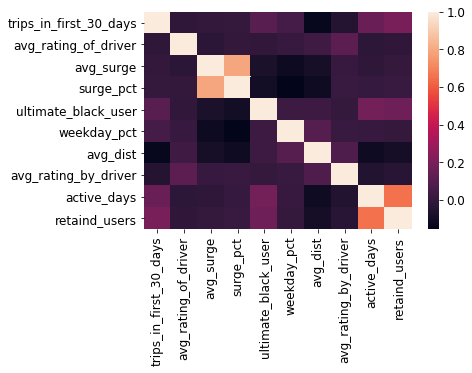

In [785]:
# Correlations between features
sns.heatmap(ultimate_df.corr())

Only surge_pct and avg_surge features have higher correlation. The correlation between these two features is 0.79. 

### Preparing Dataset


Before building models, dataset should be prepared to be used by machine learning techniques. As a first step, the categorial features are converted to integers. In second step, the redundant columns which are 'signup_date' , 'last_trip_date' and 'active_days' should be deleted. Then, the 'retaind_users' column is considered as target. Finally, the dataset is divided into two train and test datasets.

In [786]:
# Defining seed as a random_state 
seed = 0

In [787]:
#  Categorial features are converted to integers
ultimate_df['city'] = ultimate_df['city'].apply(lambda x: 0 if x == 'Winterfell' else 1 if x == 'Astapor' else 2)
ultimate_df['phone'] = ultimate_df['phone'].apply(lambda x: 0 if x == 'iPhone' else 1)
ultimate_df['ultimate_black_user'] = ultimate_df['ultimate_black_user'].apply(lambda x: 1 if x else 0)


/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [788]:
# Drop datetime features redundant column
ultimate_df.drop(['signup_date' , 'last_trip_date', 'active_days'], axis=1, inplace=True)

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [789]:
ultimate_df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retaind_users
0,2,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0,0
1,1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0,0
2,1,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0,0
3,2,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9,1
4,0,14,4.4,1.19,1,11.8,0,82.4,3.13,4.9,0


Split the data set into train and test by considering 30% of data for testing and 70% for training.

In [790]:
# Create feature and target dataset
X = ultimate_df.iloc[:, :-1]
X.head()


,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,2,4,4.7,1.10,0,15.4,1,46.2,3.67,5.0
1,1,0,5.0,1.00,1,0.0,0,50.0,8.26,5.0
2,1,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0
3,2,9,4.6,1.14,0,20.0,1,80.0,2.36,4.9
4,0,14,4.4,1.19,1,11.8,0,82.4,3.13,4.9


In [791]:
# Consider retaind_users as target 
y = ultimate_df.iloc[:,-1]
y

0        0
1        0
2        0
3        1
4        0
        ..
49993    1
49994    0
49995    0
49997    0
49998    0
Name: retaind_users, Length: 41445, dtype: int64

In [792]:
# Split the dataset into traina and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [793]:
X_test

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
25604,1,3,5.0,1.08,0,11.1,1,100.0,7.45,5.0
27391,0,0,4.9,1.00,0,0.0,0,66.7,4.45,4.7
5222,0,1,5.0,1.06,0,5.9,0,35.3,2.78,4.9
38347,2,7,4.8,1.05,0,20.0,1,80.0,2.05,4.9
21652,1,0,4.3,1.00,0,0.0,0,75.0,1.85,4.8
...,...,...,...,...,...,...,...,...,...,...
39783,0,2,3.4,1.04,1,16.7,1,50.0,9.79,5.0
9146,1,1,5.0,1.00,0,0.0,1,50.0,6.66,5.0
41713,0,18,4.2,1.01,0,2.6,1,30.8,2.71,4.3
30933,0,1,5.0,1.00,1,0.0,0,100.0,1.76,5.0


In [794]:
y_test

25604    0
27391    1
5222     1
38347    0
21652    0
        ..
39783    0
9146     0
41713    1
30933    0
14832    0
Name: retaind_users, Length: 8289, dtype: int64

In [795]:
X_train

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
22191,1,5,4.3,1.33,0,38.9,1,27.8,5.14,4.9
47213,1,0,5.0,1.00,1,0.0,0,100.0,2.15,5.0
11357,1,0,5.0,1.00,1,0.0,1,100.0,17.12,5.0
1547,1,1,5.0,1.00,0,0.0,0,100.0,6.28,4.0
25215,1,1,5.0,1.00,1,0.0,1,50.0,5.49,4.8
...,...,...,...,...,...,...,...,...,...,...
24970,0,4,4.1,1.00,0,0.0,1,83.9,4.32,4.6
38719,1,1,4.0,1.25,0,50.0,0,50.0,6.78,5.0
36674,0,21,3.7,1.00,0,0.0,0,77.3,2.14,4.5
25563,1,0,4.8,1.00,1,0.0,0,33.3,4.16,3.8


In [796]:
y_train

22191    1
47213    0
11357    0
1547     0
25215    0
        ..
24970    1
38719    1
36674    1
25563    0
3274     0
Name: retaind_users, Length: 33156, dtype: int64

# 2. Build the Model

### Machine Learning

Since the problem is classification problem ( users are categorized into Active (1) or inactive (0)),  Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier methods are employed in this project. In order to describe the performance of these classification models, accuracy score function from sklearn is used. 

In [797]:
# Create a list of the name of ML techniques that are going to be used in this project 
model_name = [ ]

# Create a list of accuracy score of employed techniques for comparison
model_accuracy = []

### Logistic Regression

In [798]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [799]:
# Logistic Regression
lr_model = LogisticRegression(random_state=seed)
lr_model.fit(X_train, y_train)
y_lr_perd = lr_model.predict(X_test)

accuracy_score_lr = accuracy_score(y_test, y_lr_perd)
print("Accuracy score of Random Forest Classifier on training data: {:2f}" .format(accuracy_score_lr))


/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score of Random Forest Classifier on training data: 0.732658


In [800]:
 print ("classification_report of Logistic Regression is: {}".format(classification_report(y_test, y_lr_perd)))

classification_report of Logistic Regression is:               precision    recall  f1-score   support

           0       0.74      0.96      0.84      5915
           1       0.63      0.16      0.26      2374

    accuracy                           0.73      8289
   macro avg       0.69      0.56      0.55      8289
weighted avg       0.71      0.73      0.67      8289



In [801]:
cm_lr = confusion_matrix(y_test, y_lr_perd)
cm_lr

array([[5689,  226],
       [1990,  384]])

In [802]:
# Add the name of the technique and its accuracy_score 

model_name.append('Logistic_Regression')
model_accuracy.append(accuracy_score_lr)


### Random Forest Classifier

In [803]:
from sklearn.ensemble import RandomForestClassifier

In [804]:
rfc_model = RandomForestClassifier(random_state=seed)
rfc_model.fit(X_train, y_train)
y_rfc_pred = rfc_model.predict(X_test)

accuracy_score_rfc = accuracy_score(y_test, y_rfc_pred)
print("Accuracy score of Random Forest Classifier on training data: {:2f}" .format(accuracy_score_rfc))

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score of Random Forest Classifier on training data: 0.743274


In [805]:
 print ("classification_report of Random Forest Classifier is: {}".format(classification_report(y_test, y_rfc_pred)))

classification_report of Random Forest Classifier is:               precision    recall  f1-score   support

           0       0.79      0.87      0.83      5915
           1       0.57      0.42      0.48      2374

    accuracy                           0.74      8289
   macro avg       0.68      0.65      0.66      8289
weighted avg       0.73      0.74      0.73      8289



In [806]:
cm_rfc = confusion_matrix(y_test, y_rfc_pred)
cm_rfc

array([[5171,  744],
       [1384,  990]])

In [807]:
# Add the name of the technique and its accuracy_score 

model_name.append('Random_Forest')
model_accuracy.append(accuracy_score_rfc)

### GradientBoostingClassifier

In [808]:
from sklearn.ensemble import GradientBoostingClassifier

In [809]:
gbc_model = GradientBoostingClassifier(random_state= seed)

gbc_model.fit(X_train, y_train)
y_gbc_pred = gbc_model.predict(X_test)

accuracy_score_gbc = accuracy_score(y_test, y_gbc_pred)
print("Accuracy score of Gradient Boosting Classifier on training data: {:2f}" .format(accuracy_score_gbc))

Accuracy score of Gradient Boosting Classifier on training data: 0.781156


In [810]:
 print ("classification_report of Gradient Boosting Classifier is: {}".format(classification_report(y_test, y_gbc_pred)))

classification_report of Gradient Boosting Classifier is:               precision    recall  f1-score   support

           0       0.81      0.91      0.86      5915
           1       0.67      0.46      0.55      2374

    accuracy                           0.78      8289
   macro avg       0.74      0.69      0.70      8289
weighted avg       0.77      0.78      0.77      8289



In [811]:
cm_gbc = confusion_matrix(y_test, y_gbc_pred)
cm_gbc

array([[5372,  543],
       [1271, 1103]])

In [812]:
# Add the name of the technique and its accuracy_score 

model_name.append('Gradient_Boosting')
model_accuracy.append(accuracy_score_gbc)

### cross-validation

Another way to ensure that the high validation numbers you get aren't biased by the way training set and test set are separated, is to use cross-validation.

In [813]:
from sklearn.model_selection import cross_val_score

In [814]:
# Cross validation for Logistic Regression
scores_cv_LR = cross_val_score(lr_model, X_train, y_train, cv=5)
print(scores_cv_LR)
print("Average 5 fold CV score is: {}" .format(np.mean(scores_cv_LR)))

/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.73552473 0.73431846 0.73427839 0.73925501 0.73182504]
Average 5 fold CV score is: 0.7350403251953898


/Users/mehrnaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [815]:
# Cross validation for Gradient Boosting
scores_cv_GB = cross_val_score(gbc_model, X_train, y_train, cv=5)
print(scores_cv_GB)
print("Average 5 fold CV score is: {}" .format(np.mean(scores_cv_GB)))

[0.77774427 0.78045838 0.77484542 0.78133012 0.77948718]
Average 5 fold CV score is: 0.7787730744842614


# Evalution


In order to validate the performance of employed machine learning algorithms, some metrics have been considered that are shown in below:

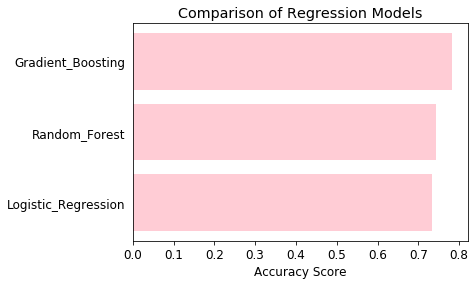

In [816]:
fig, ax = plt.subplots()

ind = range(len(model_name))
ax.barh(ind, model_accuracy, align='center', color = 'pink', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(model_name)
ax.set_xlabel('Accuracy Score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('MSE.png')

If the entire set of predicted labels match with the true labels, then the accuracy is 1.0 otherwise it is 0.0.
As shown in this plot, Gradient Boosting achieves 0.78 that is a better performance compared to other techniques.
Therefore, Gradient Boosting is going to be used for the rest of the project parts.

ROC curve can help to choose a threshold that balances sensitivity and specificity in a way that makes sense.

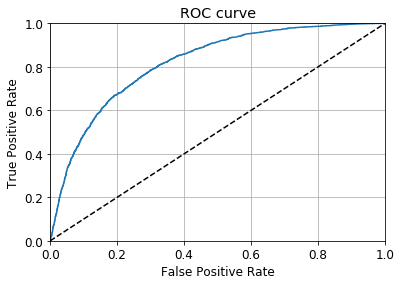

In [817]:
# Compute predicted probabilities
#probability of 1
y_pred_prob_gbc = gbc_model.predict_proba(X_test)[:,1]

# roc_curve returns 3 objects false positive rate, true positive rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gbc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [818]:
print("AUC score of Gradient Boosting is: {}" .format(roc_auc_score(y_test, y_pred_prob_gbc)))

AUC score of Gradient Boosting is: 0.8196359404965459


AUC indicates classifier performance. Better classifier has a higher value. The Gradient Boosting has high AUC (0.82).

# 3. Suggestions to Ultimate

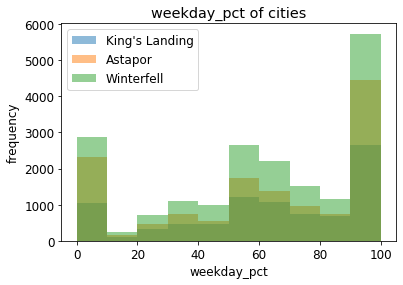

In [819]:
plt.hist(ultimate_df[ultimate_df['city']==2]['weekday_pct'],alpha=0.5,label="King's Landing")
plt.hist(ultimate_df[ultimate_df['city']==1]['weekday_pct'],alpha=0.5,label='Astapor')
plt.hist(ultimate_df[ultimate_df['city']==0]['weekday_pct'],alpha=0.5,label='Winterfell')
plt.title('weekday_pct of cities')
plt.xlabel('weekday_pct')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [820]:
ultimate_df.groupby('city')['retaind_users'].value_counts()

city  retaind_users
0     0                13906
      1                 5255
1     0                10901
      1                 2608
2     0                 4927
      1                 3848
Name: retaind_users, dtype: int64

The weekday_pct of cities plot and number of retained users indicate that Winterfell has more active users during weekday. Also, the number of retained users for Winterfell is more than the other two cities. It make sense if ultimate invest more on Winterfell rather than the others since the number of retained used in Winterfell is same as number of retained users in both Astapor and King's Landing. Moreover, ultimate can monitor users' phone usage. If iPhone users are more active than android users, they should invest to improve their app for android system.